In [208]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [209]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [210]:
features= ['sepal_length']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(iris[features], iris['species'])

DecisionTreeClassifier(max_depth=1)

In [211]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

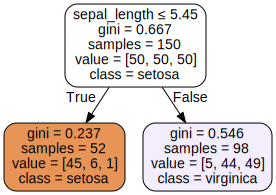

In [212]:
plot_tree_classification(dt, features, iris.species.unique())

## ASSIGNMENT 15

In [213]:
penguins = sns.load_dataset("penguins")

In [214]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [215]:
penguins_without_nan = penguins.dropna()

In [216]:
penguins_train, penguins_test = train_test_split(penguins_without_nan, test_size=0.3, stratify=penguins_without_nan['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [217]:
features= ['flipper_length_mm', 'body_mass_g']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=3)

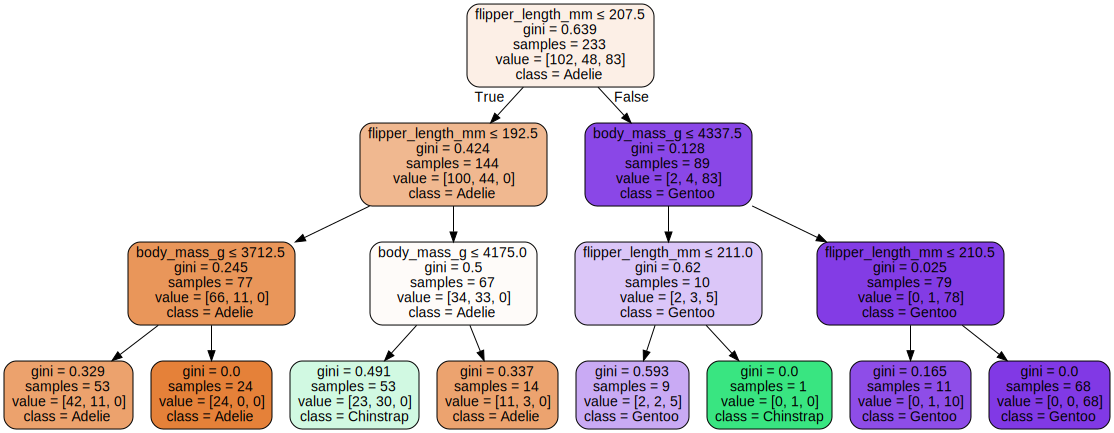

In [218]:
plot_tree_classification(dt, features, penguins.species.unique())

In [219]:
predictions_train = dt.predict(penguins_train[features])
predictions_test = dt.predict(penguins_test[features])

In [220]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [221]:
calculate_accuracy(predictions_train, penguins_train.species)


0.8197424892703863

In [222]:
calculate_accuracy(predictions_test, penguins_test.species)

0.79

In de accuracy zit een verschil. De test heeft een kleinere accuracy. Wat logisch is.
Dingen die ik niet verwachth had: De accuracy van de test en train zijn allebei erg hoog. Rond de 80%.
Verder is het verschil tussen train en test ook heel klein, minder dan 3%. Dit zijn allebei resultaten die ik niet verwacht had.

## Assignment 16

In [223]:
pokemon = pd.read_csv('Datasets/pokemon.csv', sep=",")

In [224]:
pokemon.columns

Index(['NUMBER', 'CODE', 'SERIAL', 'NAME', 'TYPE1', 'TYPE2', 'COLOR',
       'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN', 'GENERATION', 'LEGENDARY',
       'MEGA_EVOLUTION', 'HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK',
       'SP_DEF', 'SPD', 'TOTAL'],
      dtype='object')

In [225]:
pokemon.LEGENDARY = pokemon.LEGENDARY.replace(0, "normaal")
pokemon.LEGENDARY = pokemon.LEGENDARY.replace(1, "legendarisch")

In [226]:
pokemon[['NAME', 'LEGENDARY']]

NAME     LEGENDARY
0         Bulbasaur       normaal
1           Ivysaur       normaal
2          Venusaur       normaal
3     Mega Venusaur       normaal
4        Charmander       normaal
...             ...           ...
1043      Glastrier  legendarisch
1044      Spectrier  legendarisch
1045        Calyrex  legendarisch
1046        Calyrex  legendarisch
1047        Calyrex  legendarisch

[1048 rows x 2 columns]

<AxesSubplot:>

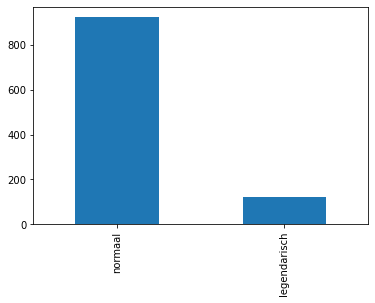

In [227]:
pokemon['LEGENDARY'].value_counts().plot(kind='bar')

In [228]:
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, stratify=pokemon['LEGENDARY'], random_state=42)
print(pokemon_train.shape, pokemon_test.shape)

(733, 22) (315, 22)


<AxesSubplot:>

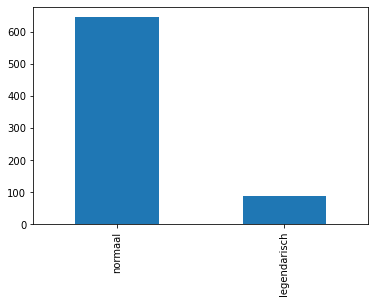

In [229]:
pokemon_train['LEGENDARY'].value_counts().plot(kind='bar')

In [230]:
features= ['HP', 'TOTAL']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(pokemon_train[features], pokemon_train['LEGENDARY'])

DecisionTreeClassifier(max_depth=3)

In [231]:
plot_tree_classification(dt, features, pokemon.LEGENDARY.unique())

Het lijkt wel alsof er iets fout is gegaan met de namen. Bij de blokken waar ik "normaal" verwacht krijg ik legendarisch en andersom.

In [232]:
predictions_train = dt.predict(pokemon_train[features])
predictions_test = dt.predict(pokemon_test[features])

In [233]:
calculate_accuracy(predictions_train, pokemon_train.LEGENDARY)


0.9536152796725784

In [234]:
calculate_accuracy(predictions_test, pokemon_test.LEGENDARY)

0.9555555555555556

De accuracy zit heel dicht bij mekaar. De accurac van de predictions is zelfs hoger dan die van de train. Dit hoge percnetage kan misschien komen omdat maar een klein gedeelte van de pokemon legendarie's zijn. En als we bij elke pokemon automatisch gokken dat het een legendary is we alsnog een hele hoge accuracy krijgen. Maar misschien zijn hp en total stat wel zo verschillend tussen legendar en non-legendaries dat we er echt met zo'n grote zekerheid over kunnen beslissen.

## Assignment 17

In [235]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [236]:
penguins_train, penguins_test = train_test_split(penguins_without_nan, test_size=0.3, random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [237]:
features= ['flipper_length_mm', 'bill_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [238]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

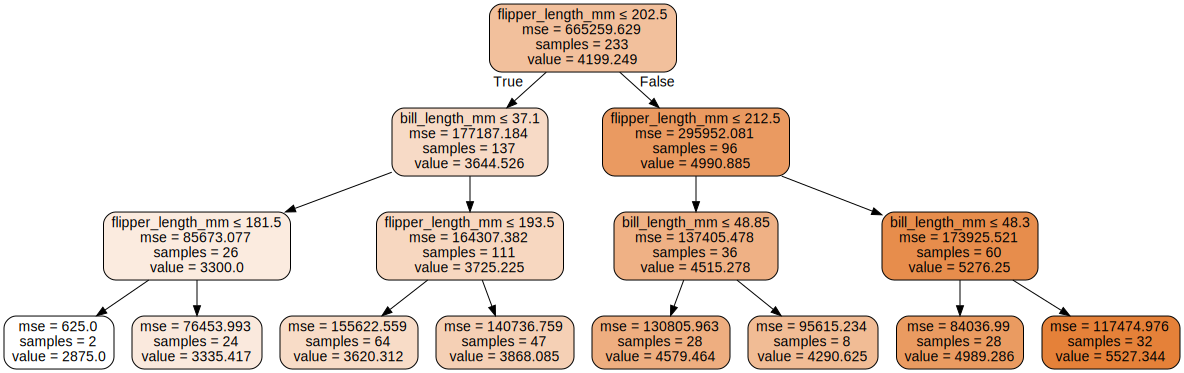

In [239]:
plot_tree_regression(dt_regression, features)

In [240]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [241]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

In [242]:
calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)

352.49168872939606

In [243]:
calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

360.7449386097482

De rmse van de test set is iets hoger maar dat is verwacht. De Rmse van beide sets liggen wel dicht bij mekaar, dus ik heb niet het idee dat er ge-overtraint is op de testset. 

## Assignment 18

In [244]:
pokemon = pd.read_csv('Datasets/pokemon.csv', sep=",")

In [245]:
pokemon.columns

Index(['NUMBER', 'CODE', 'SERIAL', 'NAME', 'TYPE1', 'TYPE2', 'COLOR',
       'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN', 'GENERATION', 'LEGENDARY',
       'MEGA_EVOLUTION', 'HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK',
       'SP_DEF', 'SPD', 'TOTAL'],
      dtype='object')

In [246]:
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, random_state=42)
print(pokemon_train.shape, pokemon_test.shape)

(733, 22) (315, 22)


In [247]:
features= ['TOTAL', 'DEF', 'SP_ATK']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(pokemon_train[features], pokemon_train['ATK'])

DecisionTreeRegressor(max_depth=3)

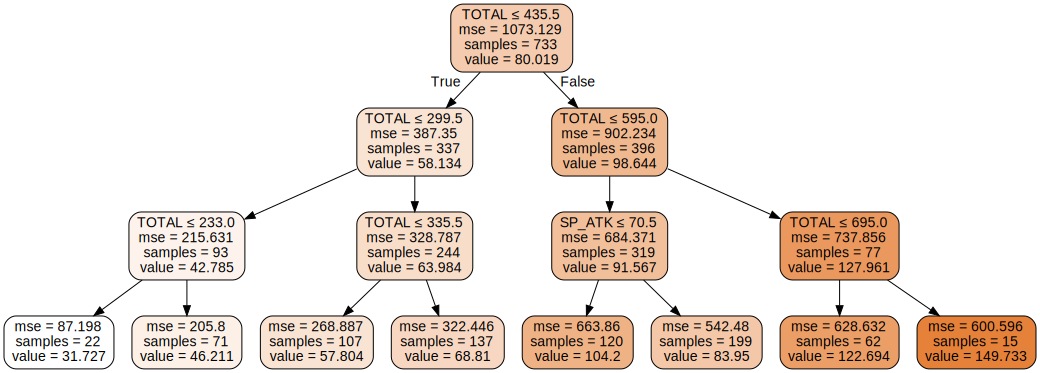

In [248]:
plot_tree_regression(dt_regression, features)

In [249]:
predictionsOnTrainset = dt_regression.predict(pokemon_train[features])
predictionsOnTestset = dt_regression.predict(pokemon_test[features])

In [250]:
calculate_rmse(predictionsOnTrainset, pokemon_train.ATK)

21.059162651845234

In [251]:
calculate_rmse(predictionsOnTestset, pokemon_test.ATK)

21.68482437891678

In [252]:
pokemon['ATK'].describe()

count    1048.000000
mean       80.250000
std        32.466227
min         5.000000
25%        55.000000
50%        76.500000
75%       100.000000
max       190.000000
Name: ATK, dtype: float64

De rmse is lager op de trainset dan op de testset. Ik had eigenlijk verwacht dat de waarden meer uit elkaar zouden liggen omdat de stats van pokemon's soms nogal "all over the place" zijn. De rmse is wel relatief hoog als je hem vergelijkt met de attack stat. We wijken erg af.